# Δένδρα και Δάση


---

> Πάνος Λουρίδας, Αναπληρωτής Καθηγητής <br />
> Τμήμα Διοικητικής Επιστήμης και Τεχνολογίας <br />
> Οικονομικό Πανεπιστήμιο Αθηνών <br />
> louridas@aueb.gr

* Μπορούμε να βελτιώσουμε την επίδοση ενός συστήματος Μηχανικής Μάθησης αν, αντί για ένα μοντέλο, χρησιμοποιήσουμε πολλά.

* Η βασική ιδέα είναι η *σοφία του πλήθους* (wisdom of crowds).

* Συχνά, ο άποψη πολλών ατόμων είναι καλύτερη από την άποψη ενός εμπειρογνώμονα.

* Έτσι κι εμείς, μπορούμε αντί για ένα μοντέλο Μηχανικής Μάθησης να εκπαιδεύσουμε πολλά και να συγκεράσουμε τις προβλέψεις τους.

* Ο πιο προφανής ίσως τρόπος να το κάνουμε αυτό είναι να δημιουργήσουμε έναν αριθμό από ανεξάρτητα μεταξύ τους μοντέλα. 

* Αλλά πώς μπορούμε να το κάνουμε αυτό, αφού έχουμε ένα σύνολο δεδομένων;

* Μπορούμε να δημιουργήσουμε «πολλαπλά» σύνολα δεδομένων, με μία τεχνική στην στατιστική η οποία ονομάζεται bootstrap.

* Στην τεχνική αυτή, κάνουμε δειγματοληψία με επανάθεση από το σύνολο των δεδομένων μας για να παράξουμε ένα νέο σύνολο, και μετά ένα άλλο νέο σύνολο, κ.λπ.

* Εκπαιδεύουμε ένα μοντέλο Μηχανικής Μάθησης σε κάθε ένα από τα σύνολα δεδομένων που έχουμε κατασκευάσει.

* Ας το δούμε στην πράξη, χρησιμοποιώντας τα δεδομένα από τις τιμές σπιτιών στην Καλιφόρνια.

In [1]:
from sklearn.datasets import fetch_california_housing

cal_housing = fetch_california_housing(as_frame=True)
cal_housing.data

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


* Ο στόχος μας είναι να προβλέψουμε την τιμή του σπιτιού, η οποία μας δίνεται σε εκατοντάδες χιλιάδες δολλάρια.

In [2]:
cal_housing.target

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: MedHouseVal, Length: 20640, dtype: float64

* Για να έχουμε μια ιδέα για τις προβλέψεις μας, ας δούμε τις βασικές μετρικές του στόχου μας:

In [3]:
cal_housing.target.describe()

count    20640.000000
mean         2.068558
std          1.153956
min          0.149990
25%          1.196000
50%          1.797000
75%          2.647250
max          5.000010
Name: MedHouseVal, dtype: float64

* Θα ξεκινήσουμε με έναν `DecisionTreeRegressor`.

* Θα μετρήσουμε το λάθος με βάση το Μέσο Απόλυτο Λάθος (Mean Absolute Error).

* Στο scikit-learn, ως μετρική εμφανίζεται ως `neg_mean_absolute_error` (επειδή συνήθως θέλουμε να το ελαττώσουμε), οπότε θα αλλάζουμε το πρόσημό του.

In [4]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

cal_tree = DecisionTreeRegressor()
cv_scores = cross_val_score(cal_tree,
                            cal_housing.data, 
                            cal_housing.target, 
                            cv=KFold(n_splits=5, shuffle=True),
                            scoring="neg_mean_absolute_error",
                            n_jobs=-1)
print(-cv_scores.mean(), cv_scores.std())

0.4658548803294574 0.011593532950953143


* Η υλοποίηση του «πλήθους» στο scikit-learn γίνεται μέσω των `BaggingRegressor` και `BaggingClassifier`.

In [5]:
from sklearn.ensemble import BaggingRegressor

bagging_cal_tree = BaggingRegressor(DecisionTreeRegressor(),
                                    n_estimators=50, 
                                    n_jobs=-1)
bagged_cv_scores = cross_val_score(bagging_cal_tree, 
                                   cal_housing.data,
                                   cal_housing.target,
                                   cv=KFold(n_splits=5, shuffle=True),
                                   scoring="neg_mean_absolute_error",
                                   n_jobs=-1)

print(-bagged_cv_scores.mean(), bagged_cv_scores.std())

0.32984706889534887 0.004584271572097811


* Μια πιο εξελιγμένη προσέγγιση είναι τα *τυχαία δάση* (random forests).

* Όπως και προηγούμενως, φτιάχνουμε μια σειρά από ανεξάρτητα μοντέλα, συγκεκριμένα, δένδρα αποφάσεων.

* Πλην όμως, σε κάθε κόμβο δεν διερευνούμε όλα τα $p$ χαρακτηριστικά των δεδομένων για την ερώτηση που θα κάνουμε, αλλά ένα τυχαίο υποσύνολο αυτών, όπως $\sqrt{p}$.

* Η ιδέα είναι ότι το πλήθος μας θέλουμε να είναι ετερογενές. Οπότε με αυτόν τον τρόπο εξασφαλίζουμε ότι δεν θα είναι όλα τα δένδρα παρόμοια (αφού, για παράδειγμα, δεν θα έχουν όλα την ίδια ερώτηση στη ρίζα).

* Τα τυχαία δάση υλοποιούνται μέσω `RamdomForestRegressor` και `RandomForestClassifier`.

In [6]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor(n_estimators=50, n_jobs=-1)
forest_cv_scores = cross_val_score(forest,  
                                   cal_housing.data,
                                   cal_housing.target,
                                   cv=KFold(n_splits=5, shuffle=True),
                                   scoring="neg_mean_absolute_error",
                                   n_jobs=-1)
print(-forest_cv_scores.mean(), forest_cv_scores.std())

0.3304655801744186 0.006362440027010323


* Μπορούμε να προχωρήσουμε ένα βήμα ακόμα τη στοχαστικότητα.

* Στα *ακραίως στοχαστικά δένδρα* (extremely randomised trees), επιλέγουμε στοχαστικά όχι μόνο το χαρακτηριστικό για το οποίο θα κάνουμε την ερώτηση σε κάθε κόμβο, αλλά και την τιμή της ερώτησης.

* Τα ακραίως στοχαστικά δένδρα υλοποιούνται μέσω `ExtraTreesRegressor` και `ExtraTreesClassifier`.

In [7]:
from sklearn.ensemble import ExtraTreesRegressor

extremely_rts = ExtraTreesRegressor(n_estimators=50, n_jobs=-1)

extremely_cv_scores = cross_val_score(extremely_rts, 
                                      cal_housing.data,
                                      cal_housing.target,
                                      cv=KFold(n_splits=5, shuffle=True),
                                      scoring="neg_mean_absolute_error",
                                      n_jobs=-1)
print(-extremely_cv_scores.mean(), extremely_cv_scores.std())

0.3255784345930232 0.003723003060250751


* Συνήθως, οι προσεγγίσεις αυτές φέρνουν καλύτερα αποτελέσματα από ατομικά μοντέλα.

* Αλλά ενώ τα δένδρα αποφάσεων έχουν, όπως έχουμε πει, πολύ καλή ερμηνευσιμότητα, όταν έχουμε πολλά δένδρα ή δάση η κατάσταση αλλάζει κάπως.

* Αν θέλουμε να δούμε πώς τα σύνθετα μοντέλα μας παίρνουν τις αποφάσεις τους, μπορούμε να εξατάσουμε τις *σημαντικότητες των χαρακτηριστικών* (feature importances), οι οποίες μας δίνουν συνολικά μια ένδειξη για το πόσο σημαντικό είναι το κάθε χαρακτηριστικό στις προβλέψεις του μοντέλου.



In [8]:
import numpy as np

extremely_rts = ExtraTreesRegressor(n_estimators=50, n_jobs=-1)
extremely_rts.fit(cal_housing.data, cal_housing.target)
importances = extremely_rts.feature_importances_

std = np.std([tree.feature_importances_ for tree in extremely_rts.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

for i in indices:
    print(cal_housing.feature_names[i], importances[i])

MedInc 0.5047499584921861
Longitude 0.11048899335613349
AveOccup 0.10719063876857422
Latitude 0.10234967518089452
HouseAge 0.07282073763359871
AveRooms 0.04045709194972809
AveBedrms 0.03458287608670286
Population 0.02736002853218213


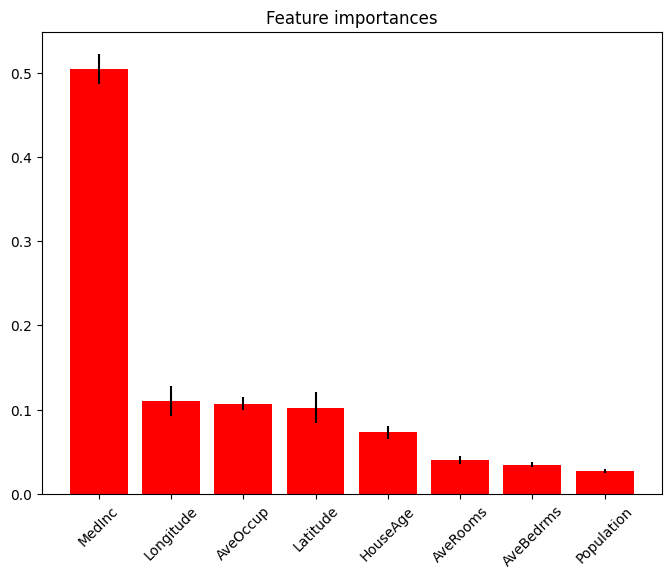

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.title("Feature importances")
plt.bar(range(len(cal_housing.feature_names)), importances[indices],
        tick_label=[cal_housing.feature_names[x] for x in indices],
        color="r", yerr=std[indices], align="center")
_ = plt.xticks(rotation=45)

* Μια εναλλακτική προσέγγιση είναι, αντί να κατασκευάζουμε μοντέλα που είναι ανεξάρτητα μεταξύ τους, να κατασκευάζουμε μοντέλα διαδοχικά.

* Η ιδέα τώρα είναι ότι κάθε μοντέλο θα προβλέπει αυτό που δεν μπορεί να προβλέψουν τα προηγούμενα μοντέλα.

* Οπότε με κάθε μοντέλο προχωράμε συνολικά σε καλύτερες προβλέψεις.

* Η προσέγγιση αυτή ονομάζεται *ώθηση* (boosting).

* Στo scikit-learn μπορούμε να χρησιμοποιήσουμε `AdaBoostRegressor` ή `AdaBoostClassifier`.

In [10]:
from sklearn.ensemble import AdaBoostRegressor

clf = DecisionTreeRegressor()
ada_boost_rgr = AdaBoostRegressor(clf, n_estimators=50)
ada_boost_cv_scores = cross_val_score(ada_boost_rgr, 
                                      cal_housing.data,
                                      cal_housing.target,
                                      cv=KFold(n_splits=5, shuffle=True),
                                      scoring="neg_mean_absolute_error",
                                      n_jobs=-1)
print(-ada_boost_cv_scores.mean(), ada_boost_cv_scores.std())

0.3012587596899225 0.00453812318997897


* Ομοίως μπορούμε να δούμε τη σημαντικότητα κάθε χαρακτηριστικού.

In [11]:
clf = DecisionTreeRegressor()
ada_boost_rgr = AdaBoostRegressor(clf, n_estimators=50)
ada_boost_rgr.fit(cal_housing.data, cal_housing.target)
importances = ada_boost_rgr.feature_importances_

std = np.std([tree.feature_importances_ for tree in ada_boost_rgr.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

for i in indices:
    print(cal_housing.feature_names[i], importances[i])

MedInc 0.3066170716188332
AveOccup 0.148120996136094
Longitude 0.13961233554581046
Latitude 0.13598950258523845
HouseAge 0.073309758782006
AveRooms 0.07088446807745612
Population 0.06649912598403143
AveBedrms 0.058966741270530316


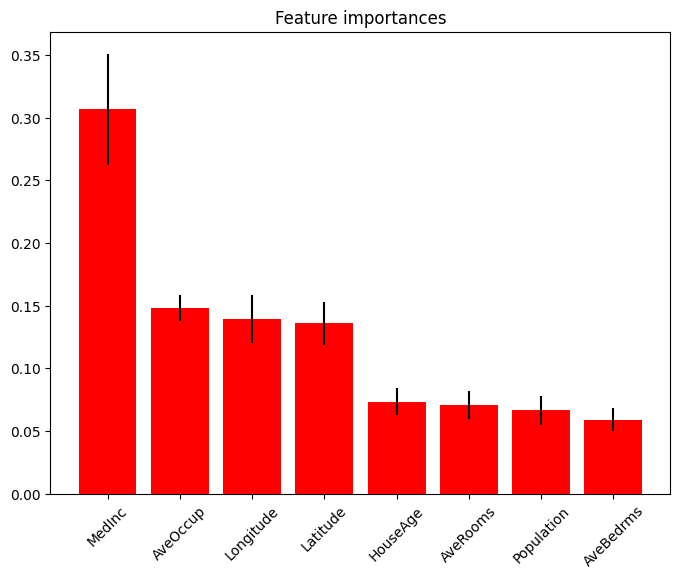

In [12]:
plt.figure(figsize=(8, 6))
plt.title("Feature importances")
plt.bar(range(len(cal_housing.feature_names)), importances[indices],
        tick_label=[cal_housing.feature_names[x] for x in indices],
        color="r", yerr=std[indices], align="center")
_ = plt.xticks(rotation=45)

* Μια πολύ καλή υλοποίηση της ιδέας της ώθησης είναι η [XGBoost](https://xgboost.readthedocs.io/en/latest/).

* Η υλοποίηση είναι εκτός scikit-learn, αλλά μπορούμε να τη χρησιμοποιήσουμε με εντελώς αντίστοιχο τρόπο.

In [13]:
import xgboost as xgb
xgb_reg = xgb.XGBRegressor()

scores = cross_val_score(xgb_reg, 
                         cal_housing.data, 
                         cal_housing.target, 
                         scoring="neg_mean_absolute_error", 
                         cv=KFold(n_splits=5, shuffle=True),
                         n_jobs=-1)

* Για να δούμε πώς τα πήγαμε:

In [14]:
print(-scores.mean(), scores.std())

0.3081335837297407 0.006274487964516776


* Μπορούμε όπως και πριν, αφού εκπαιδεύσουμε το μοντέλο στα δεδομένα μας, να δούμε τη σημαντικότητα των χαρακτηριστικών.

In [15]:
xgb_reg = xgb.XGBRegressor()
xgb_reg.fit(cal_housing.data, cal_housing.target)

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


<Axes: title={'center': 'Feature importance'}, xlabel='Importance score', ylabel='Features'>

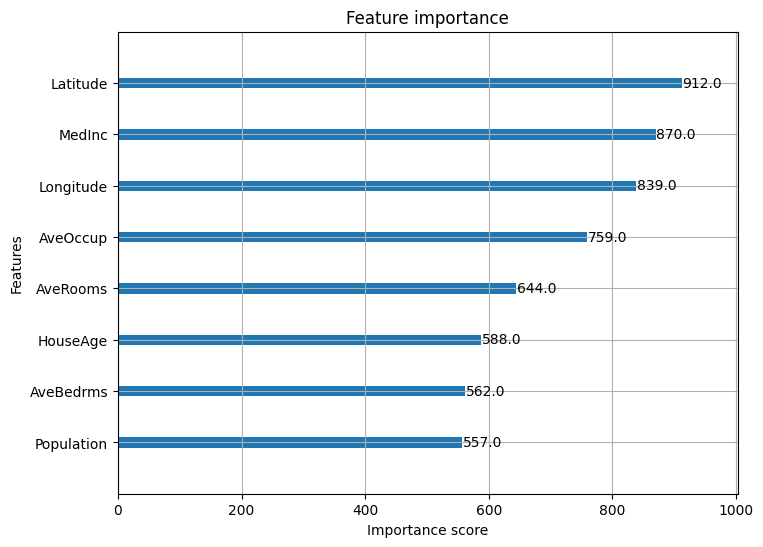

In [16]:
fig = plt.figure(figsize=(8, 6))
xgb_reg.get_booster().feature_names = cal_housing.feature_names
xgb.plot_importance(xgb_reg, ax = fig.gca())

* Αφού φύγαμε από το scikit-learn, μια άλλη εξαιρετική υλοποίηση της ιδέας της ώθησης είναι το [LightGBM](https://lightgbm.readthedocs.io/en/latest/index.html).

In [17]:
import lightgbm as lgb

lgb_reg = lgb.LGBMRegressor()
scores = cross_val_score(lgb_reg, 
                         cal_housing.data, 
                         cal_housing.target,
                         scoring="neg_mean_absolute_error",
                         cv=KFold(n_splits=5, shuffle=True),
                         n_jobs=-1)

print(-scores.mean(), scores.std())

0.3100842983717077 0.005049336932945094


[LightGBM] [Info] Total Bins 1838
[LightGBM] [Info] Number of data points in the train set: 20640, number of used features: 8
[LightGBM] [Info] Start training from score 2.068558


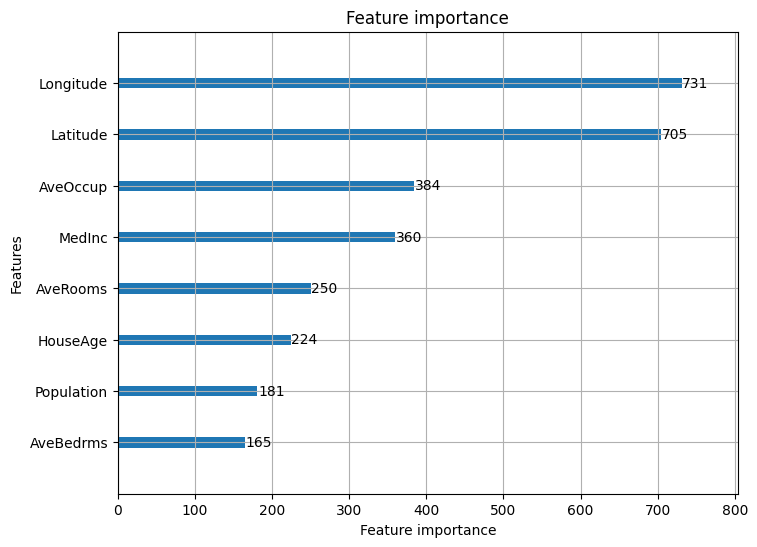

In [18]:
lgb_reg = lgb.LGBMRegressor(force_col_wise=True)
lgb_reg.fit(cal_housing.data, cal_housing.target, 
            feature_name=cal_housing.feature_names)
_ = lgb.plot_importance(lgb_reg, figsize=(8, 6))

* Αν θέλουμε να συνδυάσουμε τα αποτελέσματα διαφορετικών μοντέλων Μηχανικής Μάθησης, μπορούμε να τα χρησιμοποιήσουμε ταυτόχρονα και να πάρουμε το μέσο όρο των επιμέρους προβλέψεων.

* Έτσι, χρησιμοποιώντας έναν`VotingRegressor` (ή `VotingClassifier`) μπορούμε να συνδυάσουμε το LightGBM και το XGBoost.

In [19]:
from sklearn.ensemble import VotingRegressor

xgb_reg = xgb.XGBRegressor()
lgb_reg = lgb.LGBMRegressor()
vreg = VotingRegressor(estimators=[('xgb', xgb_reg), 
                                   ('lgb', lgb_reg)],
                       n_jobs=-1)
                       
scores = cross_val_score(vreg, 
                         cal_housing.data, 
                         cal_housing.target,
                         scoring='neg_mean_absolute_error', 
                         cv=KFold(n_splits=5, shuffle=True),
                         n_jobs=-1)

* Για να δούμε πώς τα πήγαμε:

In [20]:
print(-scores.mean(), scores.std())

0.298617389495406 0.0019194288242549028


* Άλλος τρόπος συνδυασμού μοντέλων είναι να πάρουμε τα επιμέρους μοντέλα και να τα στοιβάξουμε κάτω από ένα άλλο μοντέλο το οποίο χρησιμοποιεί τις επιμέρους προβλέψεις τους για να παράξει μια συγκερασμένη πρόβλεψη.

* Θα χρησιμοποιήσουμε έναν `StackingRegressor`, ο οποίος θα συνδυάζει τις προβλέψεις ενός LightGBM και ενός XGBoost μέσω ενός μοντέλου γραμμικής παλινδρόμησης.

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import StackingRegressor

xgb_reg = xgb.XGBRegressor()
lgb_reg = lgb.LGBMRegressor()

estimators = [('xgb', xgb_reg), ('lgb', lgb_reg)]
final_estimator = LinearRegression()

sreg = StackingRegressor(estimators=estimators, final_estimator=final_estimator, n_jobs=-1)

scores = cross_val_score(sreg, cal_housing.data, cal_housing.target,
                         cv=KFold(n_splits=5, shuffle=True), 
                         scoring='neg_mean_absolute_error', 
                         n_jobs=-1)

* Για να δούμε πώς τα πήγαμε:

In [22]:
print(-scores.mean(), scores.std())

0.3037382104416756 0.004272168148051507


* Ο συνδυασμός μοντέλων συνήθως είναι ο καλύτερος τρόπος να βελτιώσουμε την επίδοση ενός συστήματος Μηχανικής Μάθησης.

* Παρά το ότι είδαμε παραδείγματα παλινδρόμησης, τα ίδια ισχύουν (και υποστηρίζονται από τις βιβλιοθήκες) και για ταξινόμηση.

* Σε κάθε περίπτωση, η διερεύνηση εναλλακτικών λύσεων στο πρόβλημα που έχουμε μπροστά μας θα μας οδηγήσει στο βέλτιστο αποτέλεσμα!